In [1]:
from qiskit import Aer, assemble, IBMQ, transpile, QuantumCircuit
from qiskit.visualization import plot_histogram

The classical bits are considered to be a and b

# Step1: Create entangled pair

In [2]:
def create_bell_pair(qc, a, b):
    qc.h(a) # hadamard gate on first qubit
    qc.cx(a, b) # H gate followed by CNOT gate

# Step2: Sharing the bits

There are only four possible bits Charlie can share with Alice - 00, 01, 10 and 11

# Step3: Encode the message

In [3]:
def encode(qc, qubit, msg):
    if msg == "00":
        pass # do nothing for 00
    elif msg == "01":
        qc.z(qubit) # apply Z gate for 01
    elif msg == "10":
        qc.x(qubit) # apply X gate for 10
    elif msg == "11":
        # apply ZX gate on 11
        qc.z(qubit) # apply Z
        qc.x(qubit) # on resultant qubit apply X
    else:
        print("Invalid message")

# Step4 : Sending the bits

After encoding the message Alice sends the bits to Bob

# Step5: Decoding

In [4]:
def decode(qc, a, b):
    qc.cx(a, b) # CNOT gate
    qc.h(a) # H gate followed by CNOT

# Completing the protocol

Enter message 10


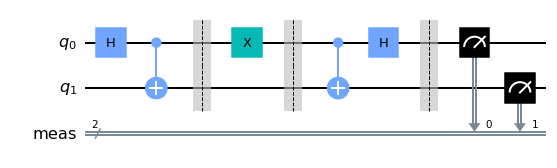

In [5]:
qc = QuantumCircuit(2) # create the circuit with 2 qubits

# charlie creates the entangled pair
create_bell_pair(qc, 0, 1)
qc.barrier() # adds a barrier to the circuit

# At this instance qubit 0 goes to Alice and 1 goes to Bob

message = input("Enter message ") # enter the message

encode(qc, 0, message) # Alice encodes her message
qc.barrier()

# Qubit send to Bob

decode(qc, 0, 1) # Bob applies recovery protocol
qc.measure_all() # Measure the qubits to read Alice's message

qc.draw()

# Visualising the measurement

{'10': 1024}


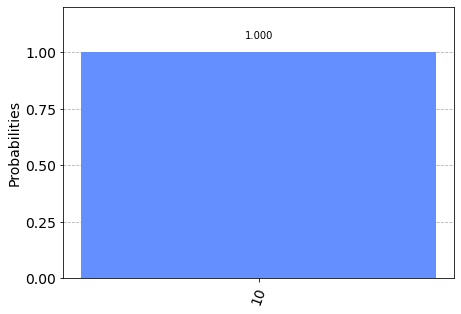

In [6]:
qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc)
result = qasm_sim.run(qobj).result()
counts = result.get_counts(qc)

print(counts)

plot_histogram(counts)

The chance of measuring the correct message is 100%